In [16]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 
%matplotlib inline  

In [17]:

result = pd.read_csv('result_grid.csv')
result

,place,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids
0,"Utrecht,Netherlands",55.116572,89.518633,10.947205,13.185218,6.0,54455.0,0.0
1,"Antwerp,Belgium",51.430628,90.609287,14.072205,13.435431,17.0,82729.0,5.0
2,"Copenhagen Municipality,Denmark",52.160867,88.552450,9.359903,15.994161,8.0,110496.0,1.0
3,"Copenhagen Municipality,Denmark",76.137765,117.624223,18.719807,17.561676,8.0,110496.0,1.0
4,"Utrecht,Netherlands",82.602182,123.678399,21.894410,15.929989,6.0,54463.0,0.0
5,"Antwerp,Belgium",77.858113,126.853002,27.817214,16.559930,17.0,82729.0,5.0
6,"Amsterdam,Netherlands",76.602857,122.732919,30.848861,14.471325,17.0,106247.0,5.0
7,"Malmo,Sweden",72.058439,115.208764,32.919255,12.919368,7.0,61467.0,2.0
8,"Bern,Switzerland",70.175192,120.652174,37.784679,18.115395,5.0,26504.0,1.0
9,"Bremen,Germany",73.191843,122.884748,28.144410,19.193988,26.0,162688.0,5.0


In [18]:
result[['city','country']] =result['place'].str.split(',',expand=True)
result["city"]= result["city"].replace('Copenhagen Municipality', "Copenhagen") 
result

,place,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids,city,country
0,"Utrecht,Netherlands",55.116572,89.518633,10.947205,13.185218,6.0,54455.0,0.0,Utrecht,Netherlands
1,"Antwerp,Belgium",51.430628,90.609287,14.072205,13.435431,17.0,82729.0,5.0,Antwerp,Belgium
2,"Copenhagen Municipality,Denmark",52.160867,88.552450,9.359903,15.994161,8.0,110496.0,1.0,Copenhagen,Denmark
3,"Copenhagen Municipality,Denmark",76.137765,117.624223,18.719807,17.561676,8.0,110496.0,1.0,Copenhagen,Denmark
4,"Utrecht,Netherlands",82.602182,123.678399,21.894410,15.929989,6.0,54463.0,0.0,Utrecht,Netherlands
5,"Antwerp,Belgium",77.858113,126.853002,27.817214,16.559930,17.0,82729.0,5.0,Antwerp,Belgium
6,"Amsterdam,Netherlands",76.602857,122.732919,30.848861,14.471325,17.0,106247.0,5.0,Amsterdam,Netherlands
7,"Malmo,Sweden",72.058439,115.208764,32.919255,12.919368,7.0,61467.0,2.0,Malmo,Sweden
8,"Bern,Switzerland",70.175192,120.652174,37.784679,18.115395,5.0,26504.0,1.0,Bern,Switzerland
9,"Bremen,Germany",73.191843,122.884748,28.144410,19.193988,26.0,162688.0,5.0,Bremen,Germany


In [19]:
coya =pd.read_csv('coya.csv')
coya

,Unnamed: 0,city,country,total_score,bike_infrastructure,bike_use_percent,road_quality
0,0,Utrecht,Netherlands,77.84,57.51,51.0,60.78
1,1,Munster,Germany,65.93,51.23,39.1,53.05
2,2,Antwerp,Belgium,60.51,34.28,28.9,53.37
3,3,Copenhagen,Denmark,60.46,55.23,29.0,61.60
4,4,Amsterdam,Netherlands,60.24,55.90,32.0,61.71
5,5,Malmo,Sweden,55.88,46.55,30.0,52.40
6,6,Hangzhou,China,52.55,32.72,30.0,35.06
7,7,Bern,Switzerland,48.76,65.10,15.0,65.46
8,8,Bremen,Germany,47.81,59.78,21.0,55.96
9,9,Hannover,Germany,46.70,53.68,19.0,51.51


In [20]:
df = result.merge(coya, on="city", how = 'inner')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop_duplicates('city',keep='last', inplace=True)
df

,place,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids,city,country_x,country_y,total_score,bike_infrastructure,bike_use_percent,road_quality
2,"Utrecht,Netherlands",66.081747,98.942720,17.515528,12.743991,6.0,54463.0,0.0,Utrecht,Netherlands,Netherlands,77.84,57.51,51.0,60.78
5,"Antwerp,Belgium",62.286491,101.482403,22.253771,13.247944,17.0,82729.0,5.0,Antwerp,Belgium,Belgium,60.51,34.28,28.9,53.37
8,"Copenhagen Municipality,Denmark",60.909941,94.099380,14.975846,14.049341,8.0,110496.0,1.0,Copenhagen,Denmark,Denmark,60.46,55.23,29.0,61.60
10,"Amsterdam,Netherlands",61.281315,98.186336,24.679089,11.577887,17.0,106253.0,5.0,Amsterdam,Netherlands,Netherlands,60.24,55.90,32.0,61.71
12,"Malmo,Sweden",57.646752,92.167013,26.335404,10.335495,7.0,61467.0,2.0,Malmo,Sweden,Sweden,55.88,46.55,30.0,52.40
14,"Bern,Switzerland",56.140155,96.521740,30.227744,14.492316,5.0,26504.0,1.0,Bern,Switzerland,Switzerland,48.76,65.10,15.0,65.46
16,"Bremen,Germany",58.553738,98.307800,22.515528,15.354466,26.0,162692.0,5.0,Bremen,Germany,Germany,47.81,59.78,21.0,55.96
18,"Hannover,Germany",59.805813,97.867496,11.801242,14.988793,13.0,113254.0,0.0,Hannover,Germany,Germany,46.70,53.68,19.0,51.51
20,"Strasbourg,France",57.377278,98.149069,15.372671,12.448762,7.0,48650.0,1.0,Strasbourg,France,France,45.45,56.44,16.0,58.82
23,"Bordeaux, France",58.990811,96.680470,24.748102,12.812849,3.0,24114.0,1.0,Bordeaux,France,France,45.42,60.23,10.0,59.40


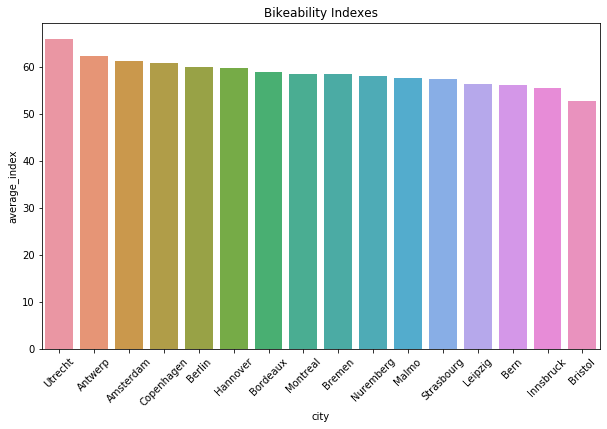

In [21]:
import seaborn as sns
plt.figure(figsize=(10,6))
# make barplot and sort bars
chart =sns.barplot(x='city', y="average_index", data=df, 
            order=df.sort_values('average_index', ascending= False).city)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Bikeability Indexes')
plt.show()


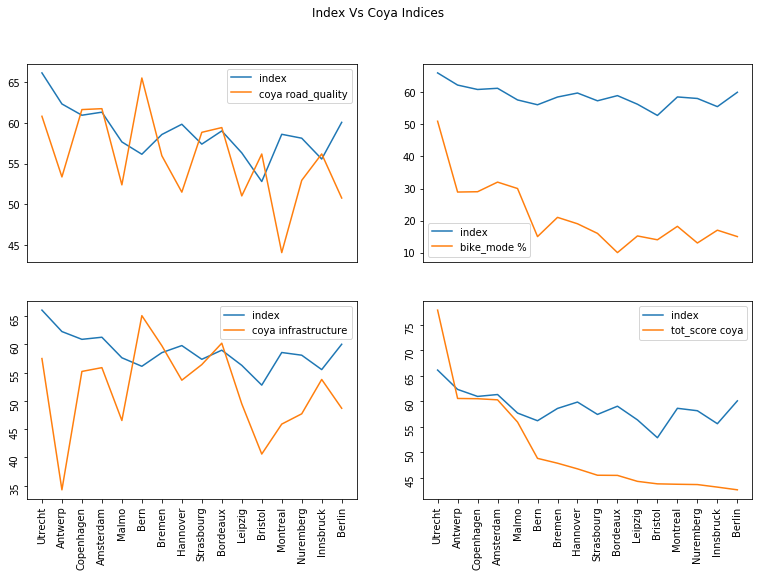

In [22]:
fig, ax = plt.subplots(2,2,figsize=(13,8))
fig.suptitle('Index Vs Coya Indices')
ax[0,0].plot(df['city'], df['average_index'], label = 'index')
ax[0,0].plot(df['city'], df['road_quality'], label = 'coya road_quality')
ax[1,0].plot(df['city'], df['average_index'], label = 'index')
ax[1,0].plot(df['city'], df['bike_infrastructure'], label = 'coya infrastructure')
ax[1,0].legend(loc = 'top right')
ax[0,0].legend(loc = 'top right')
ax[0,0].get_xaxis().set_ticks([])
ax[1,0].tick_params(labelrotation=90)

ax[1,1].plot(df['city'], df['average_index'], label = 'index')
ax[1,1].plot(df['city'], df['total_score'], label = 'tot_score coya')
ax[0,1].plot(df['city'], df['average_index'], label = 'index')
ax[0,1].plot(df['city'], df['bike_use_percent'], label = 'bike_mode %')
ax[1,1].tick_params(labelrotation=90)
ax[0,1].get_xaxis().set_ticks([])
ax[0,1].legend(loc = 'top right')
ax[1,1].legend(loc = 'top right')


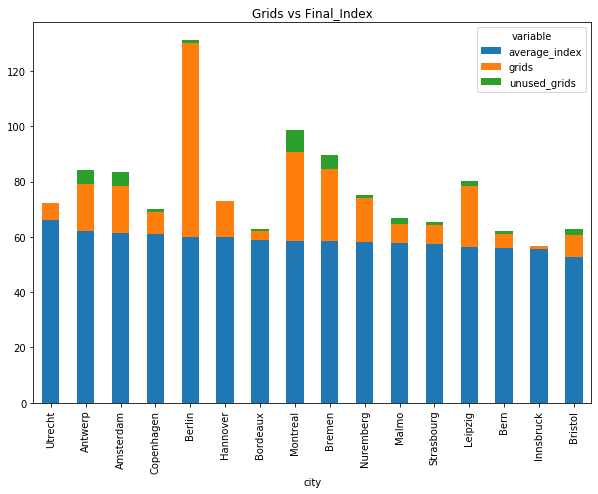

In [23]:
melted =pd.melt(df, id_vars = ['city'], value_vars= ['grids','unused_grids','average_index'])
pivot_df = melted.pivot(index='city', columns='variable', values='value')
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
pivot_df.loc[:,['average_index','grids','unused_grids']].sort_values('average_index', ascending=False).plot.bar(stacked=True, figsize=(10,7),title ='Grids vs Final_Index')

In [24]:
whole_city =pd.read_csv('result_cities.csv')

In [25]:
whole_city.head()

,place,average_index,max_index,min_index,std_index
0,"Bern, Switzerland",57.463315,97.041221,19.593450,14.766960
1,"Bordeaux, France",58.743839,99.577641,26.086957,12.459032
2,"Bremen, Germany",57.440666,97.291927,23.229814,15.358888
3,"Utrecht, Netherlands",64.890004,98.434784,17.515528,12.817918
4,"Strasbourg, France",55.593196,98.019199,22.190853,12.115330


In [26]:
whole_city[['city','country']] =whole_city['place'].str.split(',',expand=True)
whole_city["city"]= whole_city["city"].replace('Copenhagen Municipality', "Copenhagen") 
whole_city

,place,average_index,max_index,min_index,std_index,city,country
0,"Bern, Switzerland",57.463315,97.041221,19.593450,14.766960,Bern,Switzerland
1,"Bordeaux, France",58.743839,99.577641,26.086957,12.459032,Bordeaux,France
2,"Bremen, Germany",57.440666,97.291927,23.229814,15.358888,Bremen,Germany
3,"Utrecht, Netherlands",64.890004,98.434784,17.515528,12.817918,Utrecht,Netherlands
4,"Strasbourg, France",55.593196,98.019199,22.190853,12.115330,Strasbourg,France
5,"Amsterdam, Netherlands",59.483100,96.149069,17.515528,11.802711,Amsterdam,Netherlands
6,"Copenhagen Municipality,Denmark",60.223626,93.190289,16.996048,13.882731,Copenhagen,Denmark
7,"Innsbruck, Austria",58.622482,92.183116,34.460548,11.069895,Innsbruck,Austria
8,"Bristol, United Kingdom",50.688142,91.055902,14.658385,8.469805,Bristol,United Kingdom
9,"Antwerp, Belgium",60.538695,100.720498,23.229814,13.384767,Antwerp,Belgium


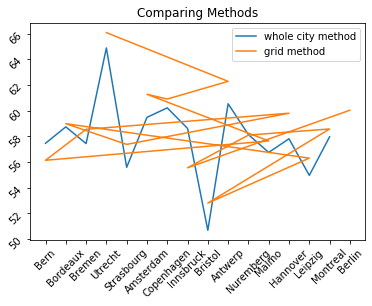

In [28]:
plt.plot(whole_city['city'], whole_city['average_index'], label = "whole city method")
plt.plot(df['city'],df['average_index'],label ='grid method')
plt.tick_params(labelrotation=45)
plt.title('Comparing Methods')

plt.legend()
plt.show()

In [30]:
filled =pd.read_csv('result_grid_filled.csv')

In [32]:
filled[['city','country']] =filled['place'].str.split(',',expand=True)
filled["city"]= filled["city"].replace('Copenhagen Municipality', "Copenhagen") 

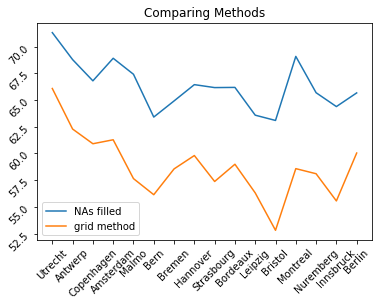

In [33]:
plt.plot(filled['city'], filled['average_index'], label = "NAs filled")
plt.plot(df['city'],df['average_index'],label ='grid method')
plt.tick_params(labelrotation=45)
plt.title('Comparing Methods')

plt.legend()
plt.show()

With NAs filled or nullified, the difference isnt much, however whole city and grid method differs.